In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire
np.random.seed(4)

### 1. Clustering with the Iris Dataset
#### Using this lesson as a guide, perform clustering on the iris dataset.
#### a. Choose features other than the ones used in the lesson.

In [2]:
iris = acquire.get_iris_data()

In [3]:
iris = acquire.prep_iris(iris)

In [4]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,0,0
1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,3,4.7,3.2,1.3,0.2,setosa,0,0
3,4,4.6,3.1,1.5,0.2,setosa,0,0
4,5,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,1
146,147,6.3,2.5,5.0,1.9,virginica,0,1
147,148,6.5,3.0,5.2,2.0,virginica,0,1
148,149,6.2,3.4,5.4,2.3,virginica,0,1


In [5]:
# Create new features for the area of the sepal and petal
iris['petal_area'] = iris.petal_length * iris.petal_width
iris['sepal_area'] = iris.sepal_width * iris.sepal_length

In [6]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area
0,1,5.1,3.5,1.4,0.2,setosa,0,0,0.28,17.85
1,2,4.9,3.0,1.4,0.2,setosa,0,0,0.28,14.70
2,3,4.7,3.2,1.3,0.2,setosa,0,0,0.26,15.04
3,4,4.6,3.1,1.5,0.2,setosa,0,0,0.30,14.26
4,5,5.0,3.6,1.4,0.2,setosa,0,0,0.28,18.00
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,1,11.96,20.10
146,147,6.3,2.5,5.0,1.9,virginica,0,1,9.50,15.75
147,148,6.5,3.0,5.2,2.0,virginica,0,1,10.40,19.50
148,149,6.2,3.4,5.4,2.3,virginica,0,1,12.42,21.08


In [7]:
train, validate, test = acquire.split_data(iris)

In [8]:
train.shape, validate.shape, test.shape

((84, 10), (36, 10), (30, 10))

(array([ 4., 13., 31., 38., 23., 28.,  9.,  2.,  0.,  2.]),
 array([10.   , 12.002, 14.004, 16.006, 18.008, 20.01 , 22.012, 24.014,
        26.016, 28.018, 30.02 ]),
 <BarContainer object of 10 artists>)

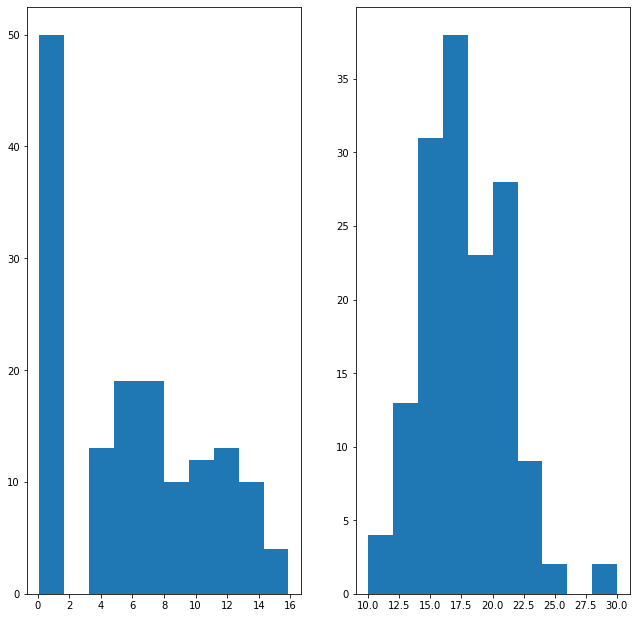

In [9]:
# Visualize the distribution of petal area and sepal area

plt.figure(figsize = (10.8,10.8))
plt.subplot(121)
plt.hist(iris.petal_area)

plt.subplot(122)
plt.hist(iris.sepal_area)

In [10]:
# Use petal/sepal area as attributes

X = iris[['petal_area', 'sepal_area']]

In [11]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [12]:
X_scaled.head()

,petal_area,sepal_area
0,-1.174041,0.008098
1,-1.174041,-0.932024
2,-1.178299,-0.830551
3,-1.169783,-1.063343
4,-1.174041,0.052866


In [13]:
# sklearn implementation of KMeans

# Define the thing:
kmeans = KMeans(n_clusters=3, random_state = 123)
# Fit the thing:
kmeans.fit(X_scaled)
# Use (predict using) the thing:
kmeans.predict(X_scaled)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

In [14]:
# Create a new column that holds the predicted clustered values
iris['cluster'] = kmeans.predict(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)

In [15]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area,cluster
0,1,5.1,3.5,1.4,0.2,setosa,0,0,0.28,17.85,2
1,2,4.9,3.0,1.4,0.2,setosa,0,0,0.28,14.70,2
2,3,4.7,3.2,1.3,0.2,setosa,0,0,0.26,15.04,2
3,4,4.6,3.1,1.5,0.2,setosa,0,0,0.30,14.26,2
4,5,5.0,3.6,1.4,0.2,setosa,0,0,0.28,18.00,2
...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,0,1,11.96,20.10,1
146,147,6.3,2.5,5.0,1.9,virginica,0,1,9.50,15.75,0
147,148,6.5,3.0,5.2,2.0,virginica,0,1,10.40,19.50,1
148,149,6.2,3.4,5.4,2.3,virginica,0,1,12.42,21.08,1


In [16]:
# View the values of the Cluster Centers aka Centroids. The output will be scaled.
kmeans.cluster_centers_

array([[ 0.12706816, -0.65997016],
       [ 1.14581844,  1.03442395],
       [-1.15592136, -0.12657062]])

In [17]:
# Make a dataframe of the centroids.
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_area,sepal_area
0,0.127068,-0.659970
1,1.145818,1.034424
2,-1.155921,-0.126571


In [18]:
# Centroids for unscaled data:
centroids = iris.groupby('cluster')['sepal_area','petal_area'].mean()
centroids

,sepal_area,petal_area
cluster,,
0,15.611552,6.390862
1,21.288837,11.175581
2,17.398776,0.365102


In [19]:
# View the KMeans labels (same as from predict)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int32)

#### b. Visualize the results of your clustering.


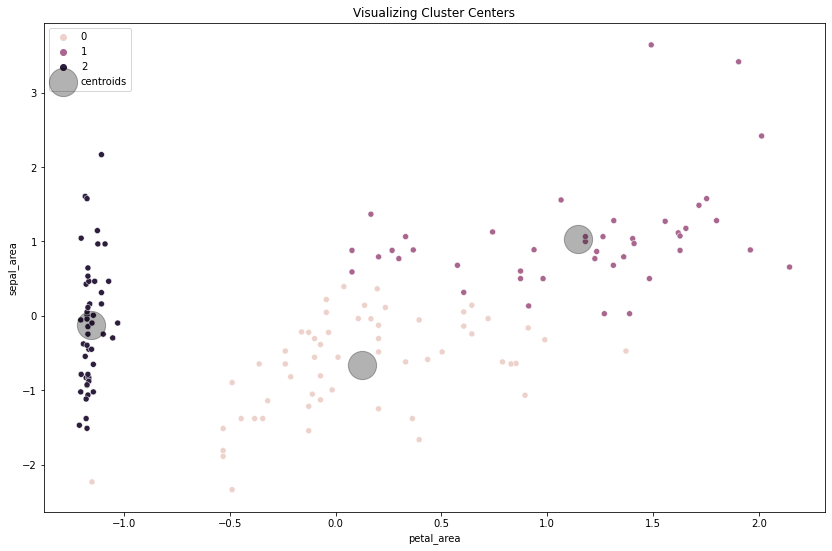

In [20]:
# lets visualize the clusters along with the centers on scaled data.
plt.figure(figsize=(14,9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_area', y='sepal_area', data = X_scaled, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_area', y='sepal_area',
                             ax = plt.gca(),
                             s = 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

In [21]:
# to avoid Seaborn 'hue' issue with integers, I change the cluster columns from integer to string
iris['cluster'] = 'cluster_' + iris.cluster.astype(str)
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area,cluster
0,1,5.1,3.5,1.4,0.2,setosa,0,0,0.28,17.85,cluster_2
1,2,4.9,3.0,1.4,0.2,setosa,0,0,0.28,14.70,cluster_2
2,3,4.7,3.2,1.3,0.2,setosa,0,0,0.26,15.04,cluster_2
3,4,4.6,3.1,1.5,0.2,setosa,0,0,0.30,14.26,cluster_2
4,5,5.0,3.6,1.4,0.2,setosa,0,0,0.28,18.00,cluster_2


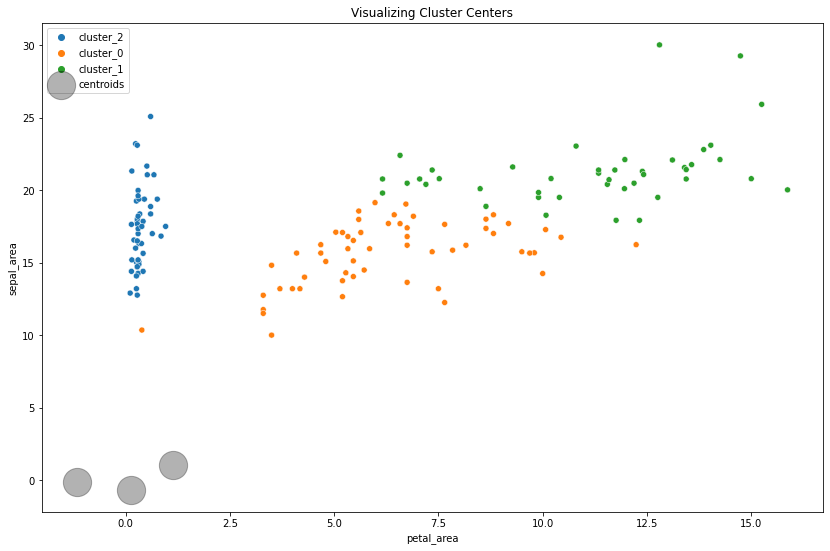

In [22]:
# lets visualize the clusters along with the centers on unscaled data.
plt.figure(figsize=(14,9))

# scatter plot of data with hue for cluster
sns.scatterplot(x='petal_area', y='sepal_area', data = iris, hue='cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x='petal_area', y='sepal_area',
                             ax = plt.gca(),
                             s = 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend()

#### c. Use the elbow method to visually select a good value for k.

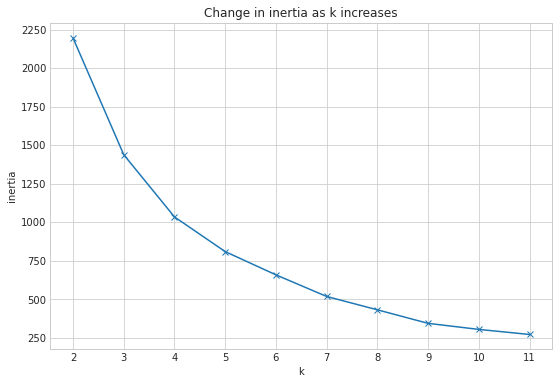

In [23]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2,12)}).plot(marker='x')
    plt.xticks(range(2,12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

#### d. Repeat the clustering, this time with 3 different features.

In [24]:
X = iris[['petal_area', 'sepal_area', 'sepal_width']]
# Scale the X

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [54]:
4

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       0, 1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [55]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

ValueError: Length of values (200) does not match length of index (150)

In [27]:
iris.sample(15)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica,petal_area,sepal_area,cluster
43,44,5.0,3.5,1.6,0.6,setosa,0,0,0.96,17.50,1
32,33,5.2,4.1,1.5,0.1,setosa,0,0,0.15,21.32,1
59,60,5.2,2.7,3.9,1.4,versicolor,1,0,5.46,14.04,2
56,57,6.3,3.3,4.7,1.6,versicolor,1,0,7.52,20.79,0
20,21,5.4,3.4,1.7,0.2,setosa,0,0,0.34,18.36,1
22,23,4.6,3.6,1.0,0.2,setosa,0,0,0.20,16.56,1
75,76,6.6,3.0,4.4,1.4,versicolor,1,0,6.16,19.80,0
100,101,6.3,3.3,6.0,2.5,virginica,0,1,15.00,20.79,0
78,79,6.0,2.9,4.5,1.5,versicolor,1,0,6.75,17.40,2
115,116,6.4,3.2,5.3,2.3,virginica,0,1,12.19,20.48,0


In [28]:
# Cluster Centers aka centroids. The output will be scaled.
kmeans.cluster_centers_

array([[ 1.11394218,  0.97040928,  0.14325578],
       [-1.1517107 ,  0.07412127,  1.10883724],
       [-0.0638286 , -0.75679046, -0.8262237 ]])

In [29]:
# Make a dataframe.
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_area,sepal_area,sepal_width
0,1.113942,0.970409,0.143256
1,-1.151711,0.074121,1.108837
2,-0.063829,-0.756790,-0.826224


In [30]:
# Centroids for unscaled data.
centroids = iris.groupby('cluster')['petal_area', 'sepal_area', 'sepal_width'].mean()
centroids

,petal_area,sepal_area,sepal_width
cluster,,,
0,11.025870,21.074348,3.119565
1,0.384878,18.071220,3.539024
2,5.494286,15.287143,2.698413


In [31]:
# Labels (same as from predict)
kmeans.labels_

array([1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0], dtype=int32)

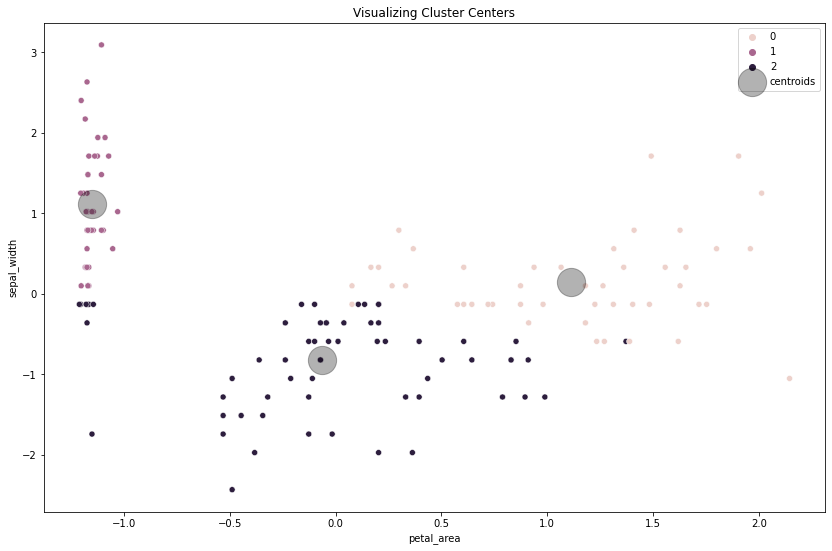

In [32]:
# Let's visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14,9))

# Scatter plot of data with hue for cluster.
sns.scatterplot(x = 'petal_area', y = 'sepal_width', data = X_scaled, hue = 'cluster')

# Plot cluster centers (centroids).
centroids_scaled.plot.scatter(x = 'petal_area', y = 'sepal_width',
                             ax = plt.gca(),
                             s = 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend()

### Look at two clusters (i.e k=2)

In [33]:
X = iris[['petal_area', 'sepal_area', 'sepal_width']]

# Scale the X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [34]:
# make a new column names cluster in iris and X_scaled dataframe

iris['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

<AxesSubplot:xlabel='petal_area', ylabel='sepal_width'>

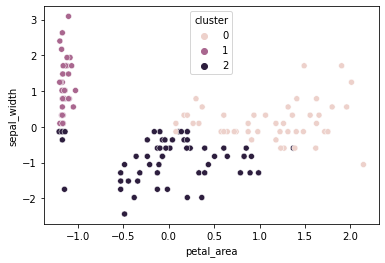

In [35]:
# Let's look at two clusters(i.e k=2)
# sklearn implementation of KMeans

# Define the thing:
kmeans = KMeans(n_clusters=2, random_state = 123)
# Fit the thing:
kmeans.fit(X_scaled)
# Use (predict using) the thing:
kmeans.predict(X_scaled)
sns.scatterplot(x = 'petal_area', y = 'sepal_width', data = X_scaled, hue='cluster')

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [36]:
# Create connection url and sql query for mall_customers
mall_url = acquire.get_connection('mall_customers')
mall_sql = '''
        select * from customers;
'''

In [37]:
# Create pandas dataframe using the previously created url and sql.
mall_customers = pd.read_sql(mall_sql,mall_url)

In [38]:
# Check out the dataframe
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [39]:
mall_customers

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
# Create lists of qualitative and quantitatve values.
qual_vals = mall_customers.select_dtypes(include='object')
quant_vals = mall_customers.select_dtypes(exclude='object').drop(columns='customer_id')

In [41]:
qual_vals, quant_vals

(     gender
 0      Male
 1      Male
 2    Female
 3    Female
 4    Female
 ..      ...
 195  Female
 196  Female
 197    Male
 198    Male
 199    Male
 
 [200 rows x 1 columns],
      age  annual_income  spending_score
 0     19             15              39
 1     21             15              81
 2     20             16               6
 3     23             16              77
 4     31             17              40
 ..   ...            ...             ...
 195   35            120              79
 196   45            126              28
 197   32            126              74
 198   32            137              18
 199   30            137              83
 
 [200 rows x 3 columns])

In [42]:
# Create dummy variables for qualitative values
dummy_df = pd.get_dummies(qual_vals, drop_first=True)
dummy_df

,gender_Male
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [43]:
# Concatenate the dummy dataframe to the original mall_customers dataframe.
mall_customers = pd.concat([mall_customers, dummy_df], axis=1)
mall_customers

,customer_id,gender,age,annual_income,spending_score,gender_Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


In [44]:
# Create a function that preps the mall_customers dataframe
def prep_mall_customers(df):
    # Create lists of qualitative and quantitatve values.
    qual_vals = df.select_dtypes(include='object')
    quant_vals = df.select_dtypes(exclude='object').drop(columns='customer_id')
    
    # Create dummy variables for qualitative values
    dummy_df = pd.get_dummies(qual_vals, drop_first=True)
    
    # Concatenate the dummy dataframe to the original mall_customers dataframe.
    mall_customers = pd.concat([df, dummy_df], axis=1)
    return mall_customers

In [45]:
mall_customers = prep_mall_customers(mall_customers)
mall_customers

,customer_id,gender,age,annual_income,spending_score,gender_Male,gender_Male
0,1,Male,19,15,39,1,1
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,0,0
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,1,1


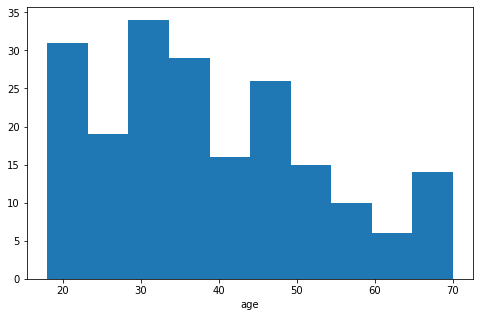

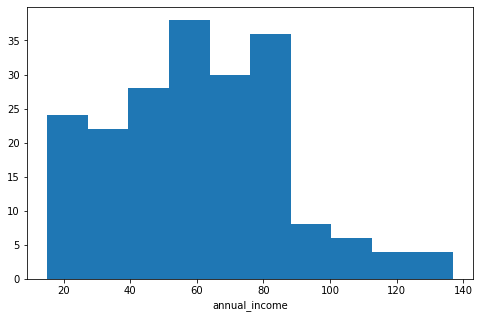

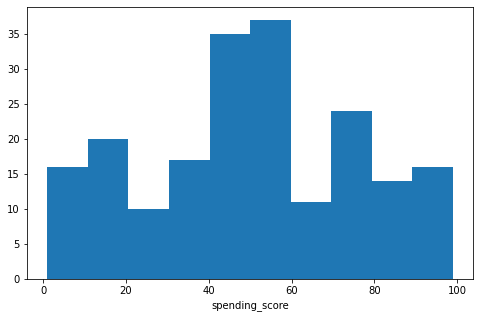

In [46]:
# Visualize the distributions of the quantitative values.

for feature in quant_vals:
    plt.figure(figsize=(8, 5))
    plt.hist(mall_customers[feature])
    plt.xlabel(feature)
    

In [47]:
# Define independent variables for k-means
X = mall_customers[['age','annual_income']]

X.head()

,age,annual_income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [48]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [49]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=3, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [50]:
# make a new column names cluster in iris and X_scaled dataframe

mall_customers['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [51]:
# Make a dataframe.
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,age,annual_income
0,1.216908,-0.356281
1,-0.874743,-0.830936
2,-0.279135,0.968519


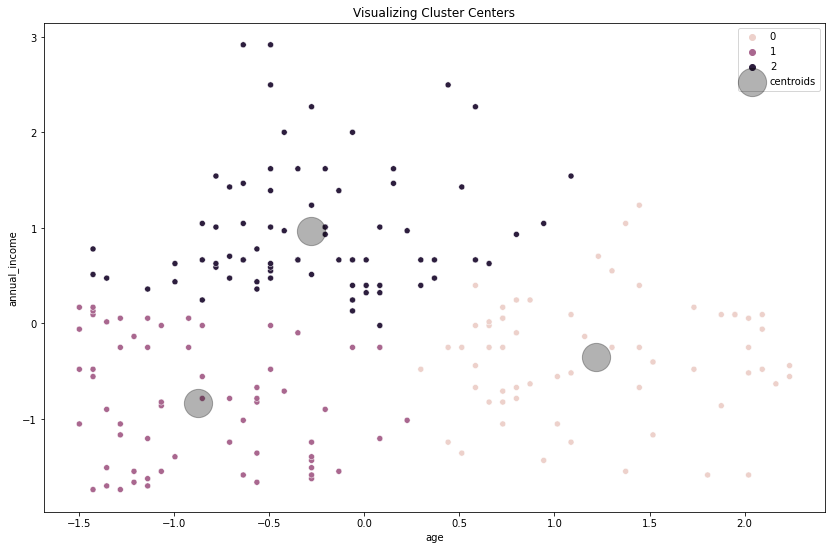

In [52]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x ='age', y ='annual_income', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'age', y = 'annual_income',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### 3. How does scaling impact the results of clustering?

In [53]:
# Centroids for unscaled data.
centroids = mall_customers.groupby('cluster')['age', 'annual_income'].mean()
centroids

ValueError: cannot reindex from a duplicate axis

In [ ]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'age', y ='annual_income', data = mall_customers, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'age', y = 'annual_income',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

### Bonus
#### a) Read in the data from this google sheet: 

https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing


In [56]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1j5EgXVTR5ikUj3G5ZCQmkq6ziz_gvtASGAdw23-5_6M/edit?usp=sharing'    

csv_export_url = sheet_url.replace('/edit?usp=', '/export?format=csv&usp=')

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


#### b) Visualize the data and guess the number and shape of the clusters.

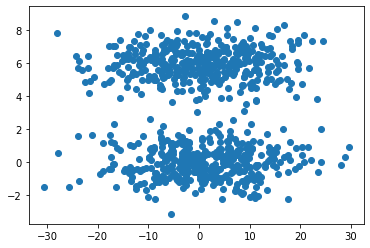

In [57]:
plt.scatter(x='x',y='y', data=df_googlesheet)

### Takeaways

* Looking at the graph I'm going to guess there are two clusters both oval in shape.

### c) Implement the KMeans algorithm on unscaled data and visualize the clusters.

In [58]:
# Create a list of the independent variables
X = df_googlesheet[['x','y']]

In [59]:
# Create the thing:
kmeans = KMeans(n_clusters=2, random_state=123)
# Fit the thing:
kmeans.fit(X)
# Use (predict using) the thing:
kmeans.predict(X)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [60]:
# make a new column named cluster
df_googlesheet['cluster'] = kmeans.predict(X)
X['cluster'] = kmeans.predict(X)

In [61]:
# Centriods for unscaled data?
centroids = X.groupby('cluster')['x', 'y'].mean()
centroids

,x,y
cluster,,
0,8.140093,2.899115
1,-7.842407,3.054280


In [62]:
X

,x,y,cluster
0,-3.641747,0.121540,1
1,-7.620447,1.810897,1
2,-6.505373,0.068072,1
3,7.730963,0.585521,0
4,17.283668,0.344804,0
...,...,...,...
795,3.941363,5.807617,0
796,6.057122,6.010463,0
797,8.373651,4.641515,0
798,-2.058756,6.077125,1


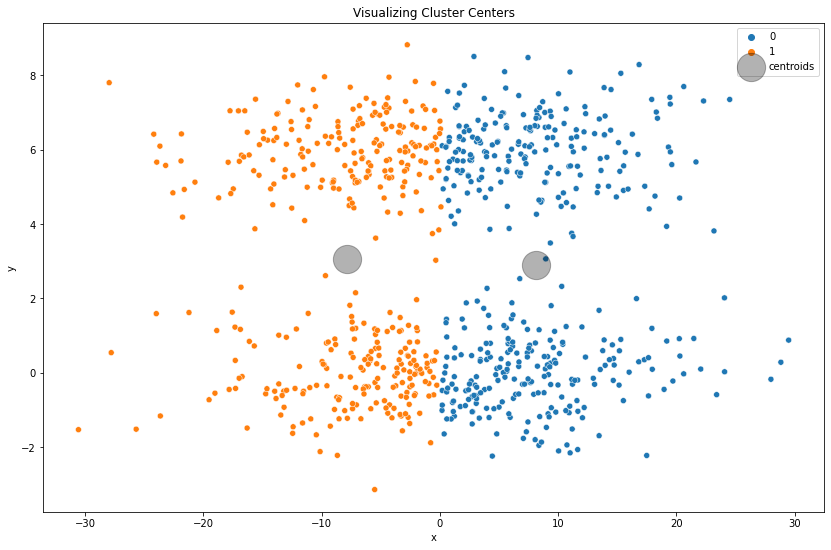

In [63]:
# lets visualize the clusters along with the centers on unscaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y ='y', data = X, hue = 'cluster')

# plot cluster centers (centroids)
centroids.plot.scatter(x = 'x', y = 'y',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### d) Repeat the step above but with scaled data.

In [64]:
# Scale X
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

X_scaled.drop(columns='cluster',inplace=True)

In [65]:
X_scaled

,x,y
0,-0.419211,-0.904027
1,-0.821099,-0.368472
2,-0.708466,-0.920978
3,0.729546,-0.756937
4,1.694464,-0.833249
...,...,...
795,0.346758,0.898557
796,0.560471,0.962863
797,0.794464,0.528883
798,-0.259313,0.983996


In [66]:
# sklearn implementation of KMeans

#define the thing
kmeans = KMeans(n_clusters=2, random_state = 123, verbose = 0)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
kmeans.cluster_centers_

array([[-0.04074052,  0.95109244],
       [ 0.04074052, -0.95109244]])

In [68]:
# Make a dataframe from centroids
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X_scaled.columns)
centroids_scaled

,x,y
0,-0.040741,0.951092
1,0.040741,-0.951092


In [69]:
X_scaled['cluster'] = kmeans.predict(X_scaled)

X_scaled

,x,y,cluster
0,-0.419211,-0.904027,1
1,-0.821099,-0.368472,1
2,-0.708466,-0.920978,1
3,0.729546,-0.756937,1
4,1.694464,-0.833249,1
...,...,...,...
795,0.346758,0.898557,0
796,0.560471,0.962863,0
797,0.794464,0.528883,0
798,-0.259313,0.983996,0


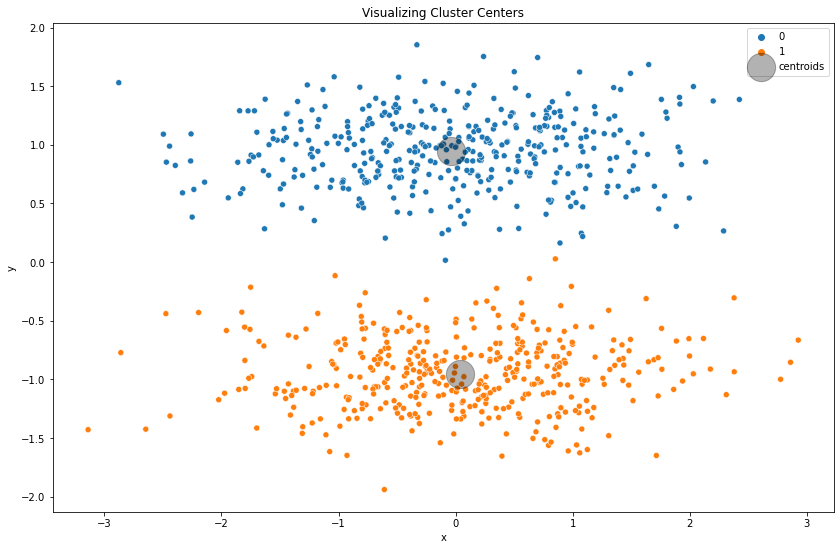

In [70]:
# lets visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'x', y ='y', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'x', y = 'y',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

### e) Write down the takeaways from this exercise.
* On the unscaled data, there is a boundary near x=0.
* The k-means algorithm chose a centroid to be on either side of x=0.


* On the scaled data, the k-means algorithm chose a centroid within each cluster of data points.